In [ ]:
# default_exp sampler.direct

# Direct Monte Carlo sampler

> Sampler class for direct Monte Carlo sampling

In [ ]:
# hide
from nbdev.showdoc import *

In [ ]:
#export
from qsam.sampler.base import Sampler
import numpy as np

In [ ]:
#export
class DirectSampler(Sampler):
    
    def stats(self, tree_idx=None):
        if tree_idx:
            p_L = self.trees[tree_idx].direct_rate
            v_L = self.trees[tree_idx].direct_variance
        else:
            p_L, v_L = [], []
            for tree in self.trees.values():
                p_L.append(tree.direct_rate)
                v_L.append(tree.direct_variance)
        return p_L, np.sqrt(v_L)
    
    def optimize(self, tree_node, circuit, grp_probs): # not really optimize here...
        locgrps = self.protocol_locgrps[circuit.id]
        flocs = self.err_model.choose_p(locgrps,grp_probs)
        grp_wgts = tuple(len(locs) for locs in flocs.values())
        return {'grp_wgts': grp_wgts, 'flocs': flocs}

In [ ]:
from qsam.examples import ghz3
from qsam.noise import E1
from qsam.sim.stabilizer import StabilizerSimulator as CHP

e = E1()

sample_range = np.logspace(-3,0,5)

sam = DirectSampler(ghz3, CHP, err_model=e)
err_params = {
    "p1": sample_range 
}

sam.run(10000, err_params)

Total:   0%|          | 0/5 [00:00<?, ?it/s]

p_phy=1.00E-03:   0%|          | 0/10000 [00:00<?, ?it/s]

p_phy=5.62E-03:   0%|          | 0/10000 [00:00<?, ?it/s]

p_phy=3.16E-02:   0%|          | 0/10000 [00:00<?, ?it/s]

p_phy=1.78E-01:   0%|          | 0/10000 [00:00<?, ?it/s]

p_phy=1.00E+00:   0%|          | 0/10000 [00:00<?, ?it/s]

(0.001,)


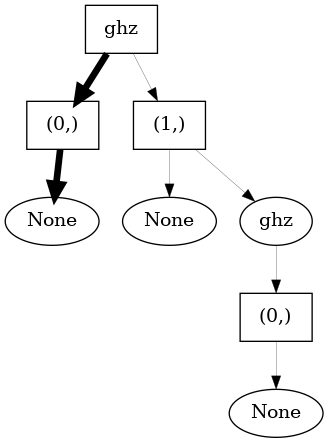

(0.005623413251903491,)


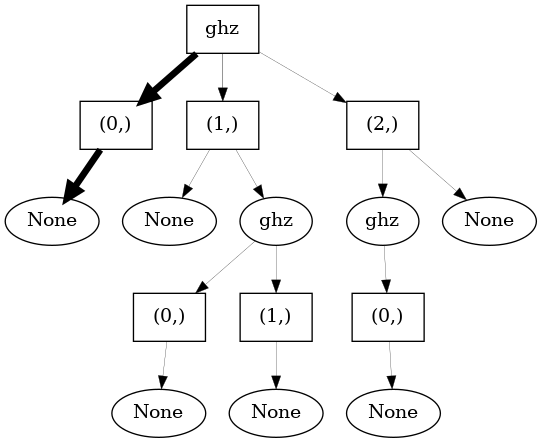

(0.03162277660168379,)


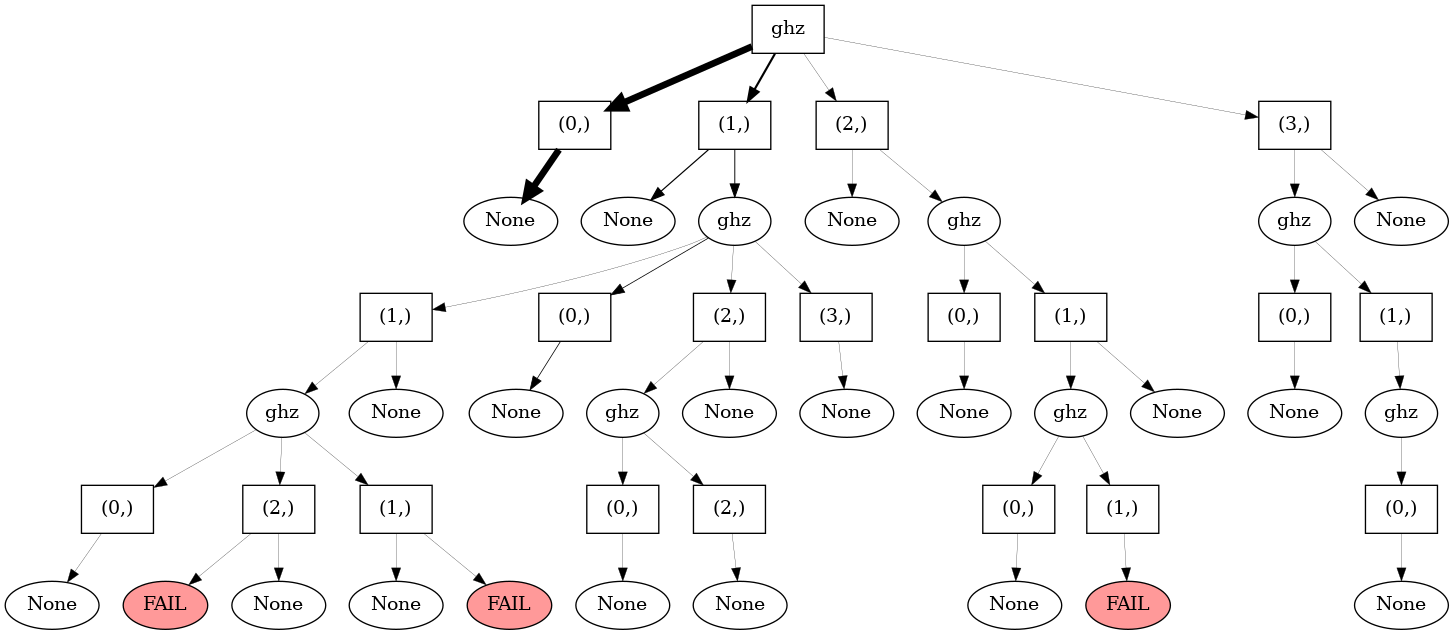

(0.1778279410038923,)


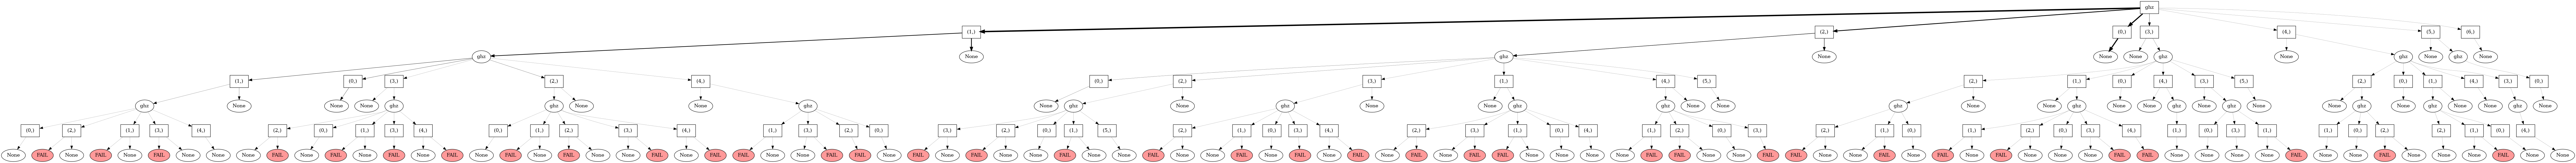

(1.0,)


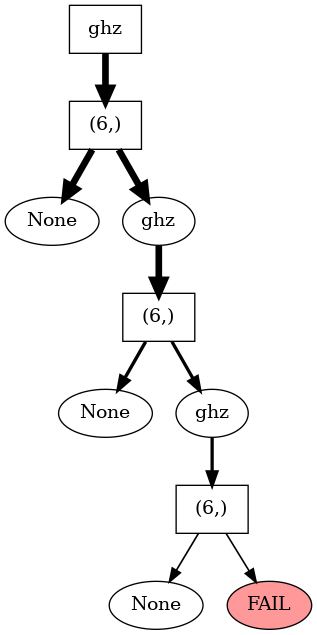

In [ ]:
for k,tree in sam.trees.items():
    print(k)
    tree.draw()